## Cross-Validation 

In [26]:
require(ISLR)
require(boot)

In [27]:
#?cv.glm  #help on cross-validation of generalized linear models

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


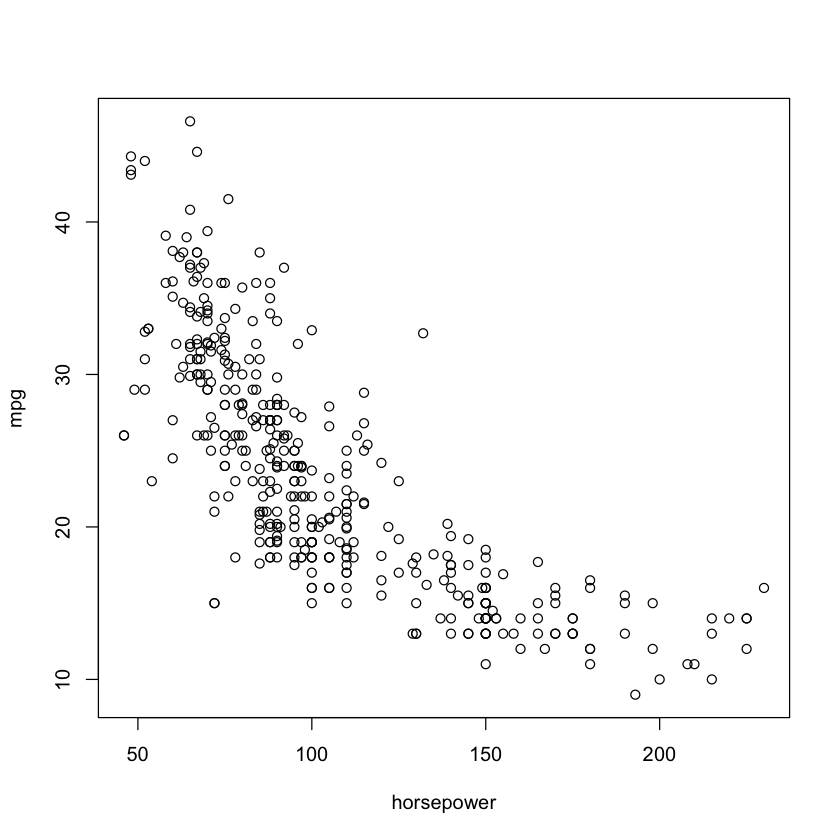

In [28]:
str(Auto)
plot(mpg~horsepower,data=Auto)

In [29]:
### Leave-one-one CV  (LOOCV)
glm.fit<-glm(mpg~horsepower,data=Auto)
cvr <- cv.glm(Auto,glm.fit)
cvr$delta

[1] 24.23151 24.23114

In [30]:
##lets write a simple function to use a formula (5.2)
loocv<-function(fit){
    h=lm.influence(fit)$h
    return (mean((residuals(fit)/(1-h))^2))
}

In [31]:
loocv(glm.fit)

[1] 24.23151

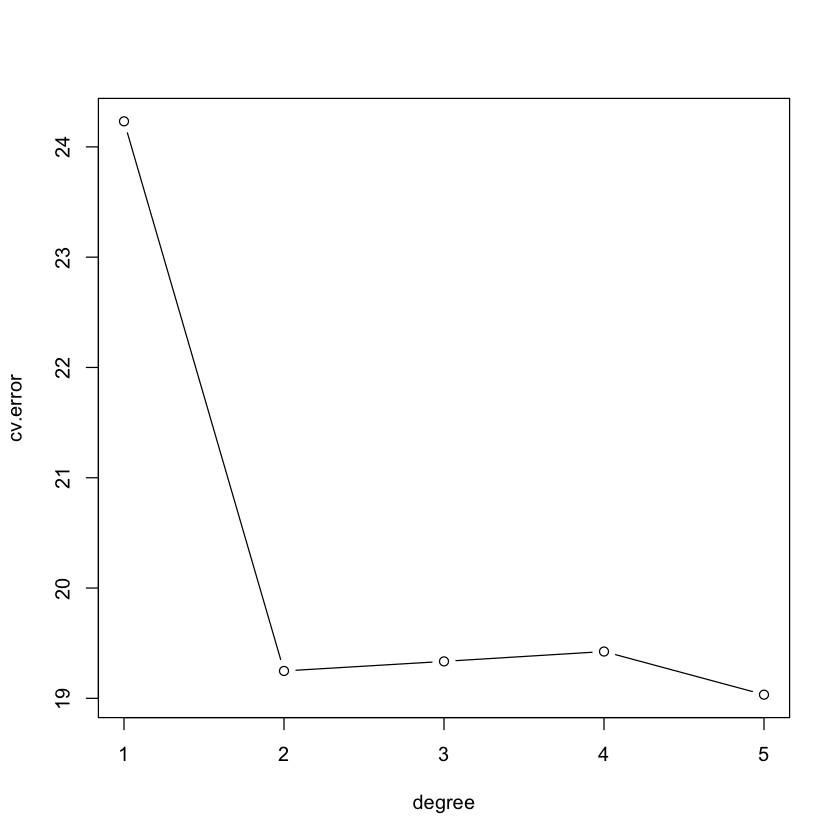

In [32]:
#lets do loocv for polynomail fit up to degree 5
cv.error<-rep(0,5)
degree<-1:5
for (d in degree) {
    glm.fit<-glm(mpg~poly(horsepower,d), data=Auto)
    cv.error[d] <- loocv(glm.fit)
}
plot(degree,cv.error,type="b")

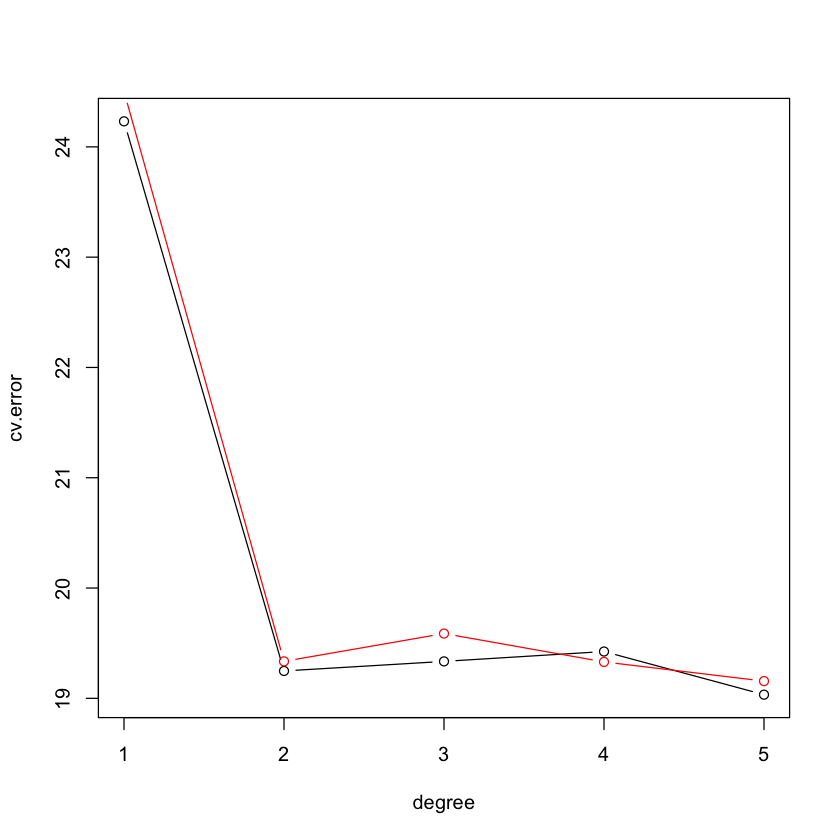

In [33]:
##10-fold cv
cv.error10<-rep(0,5)
for (d in degree){
    glm.fit<-glm(mpg~poly(horsepower,d), data=Auto)
    cv.error10[d] <- cv.glm(Auto,glm.fit,K=10)$delta[1] #much quicker execution than LOOCV
}
#compare two plots
plot(degree,cv.error,type="b")
lines(degree,cv.error10,type="b",col=2)

## Bootstrap

### main usage: get an estimate of Standard Error  of a computed value

In [41]:
## minimum risk investment example Section 5.2
#alpha is a a coefficient of investment 1 (1-alpha) is a coeff of invesment 2 
#to have a minimum variance of the 2-asset portfolio (X,Y)

alpha<-function(x,y){
    vx<-var(x)
    vy<-var(y)
    cxy<-cov(x,y)
    return( (vx-cxy)/(vx+vy-2*cxy) )
}

In [38]:
dim(Portfolio)
summary(Portfolio)

[1] 100   2

       X                  Y           
 Min.   :-2.43276   Min.   :-2.72528  
 1st Qu.:-0.88847   1st Qu.:-0.88572  
 Median :-0.26889   Median :-0.22871  
 Mean   :-0.07713   Mean   :-0.09694  
 3rd Qu.: 0.55809   3rd Qu.: 0.80671  
 Max.   : 2.46034   Max.   : 2.56599  

In [42]:
alpha(Portfolio$X,Portfolio$Y)

[1] 0.4241679

In [43]:
#what is the standard error of alpha?

alpha.fn<-function(data,index){
    return( with(data[index,],alpha(X,Y)) )  #with is a handy function
}

In [46]:
alpha.fn(Portfolio,1:100) ##rerunning alpha on original dataset  1:100 is its original index

[1] 0.4241679

In [47]:
#sample(1:100,100,replace=T) #generates an index between 1 and 100 of length=100
#of random integers drawn with replacement
alpha.fn(Portfolio,sample(1:100,100,replace=TRUE)) #compute an alpha hat star

[1] 0.4036167


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.4241679 -6.936399e-05  0.08868935

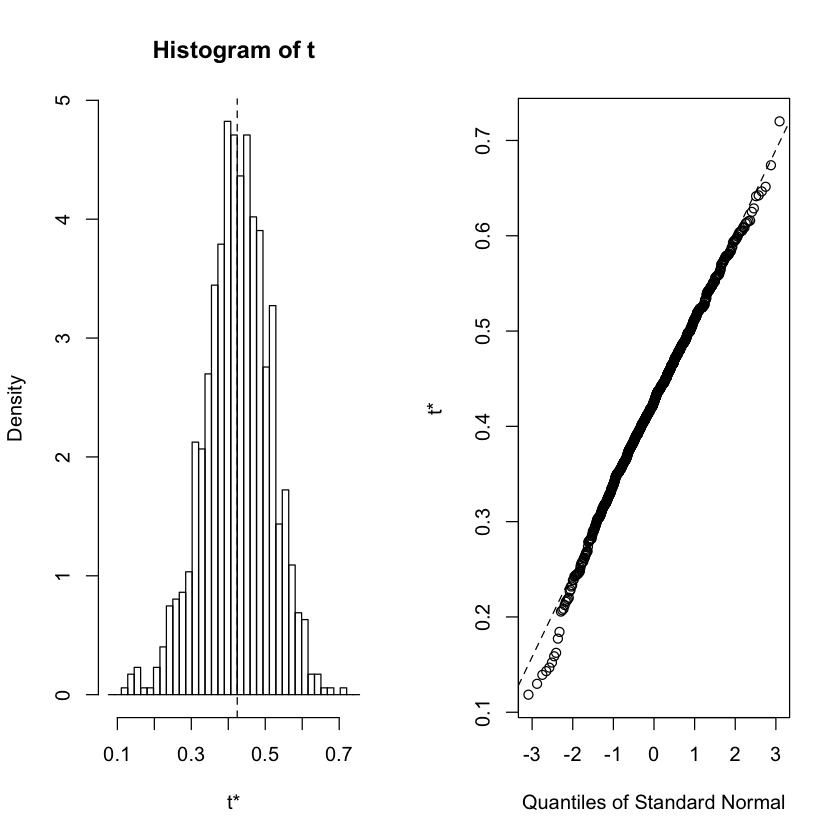

In [50]:
#running bootstarap 1000 times
set.seed(1)
boot.out<-boot(Portfolio,alpha.fn,R=1000)
boot.out
plot(boot.out)